<a href="https://colab.research.google.com/github/anshudaur/TensorFlowProjects/blob/master/EntropyReductionOfImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reduce Entropy of grayscale image.

Measure the entropy of a small grayscale image of your choice and nd a method to
reduce its entropy. In this process, ensure that the image content is still similar, i.e.
that an object in the image can still be identied as the same object by a human
observer. Provide the original image and the processed image and their respective
entropy scores and explain why your method works.




In [0]:
from google.colab import files
from IPython.display import Image

from skimage.color import rgb2gray

uploaded = files.upload()


Saving black.jpeg to black.jpeg


In [0]:
import matplotlib.pyplot as plt

def plot_compared_img(img1, img2, title1="Original image", title2="Grayscale image"):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax = axes.ravel()
    ax[0].imshow(img1)
    ax[0].set_title(title1)
    ax[1].imshow(img2,cmap=plt.cm.gray)
    ax[1].set_title(title2)
    plt.show()

Original image entropy :  7.149600281673462
Grayscale image entropy :  7.149600281673462


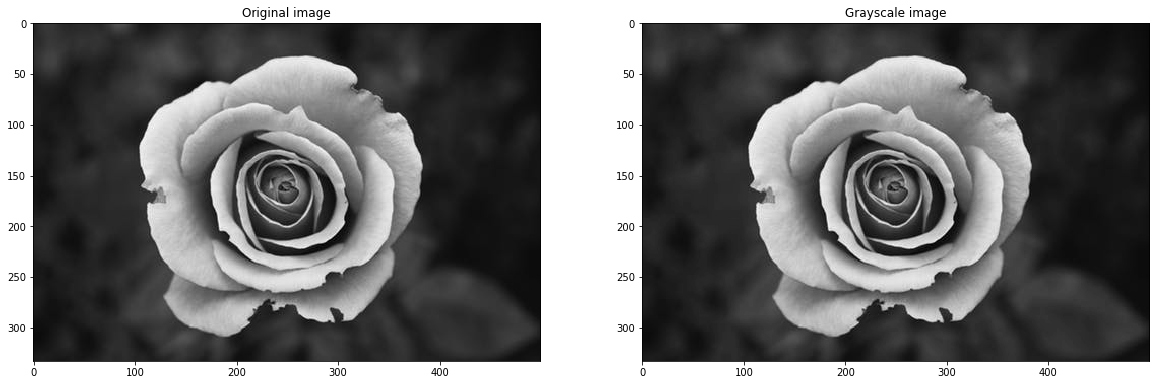

In [0]:
from scipy import misc
import scipy.io as sio
import cv2
from skimage.color import rgb2gray
from skimage.measure.entropy import shannon_entropy

img = cv2.imread("black.jpeg")
#img = rgb2gray(img)

grayImg = rgb2gray(img)

print("Original image entropy : ",shannon_entropy(img[:,:]))
print("Grayscale image entropy : ",shannon_entropy(grayImg[:,:]))
plot_compared_img(img, grayImg,"Original image", "Grayscale image")

Grayscale image entropy :  7.149600281673462
Entropy of first differential image :  5.244398154568182


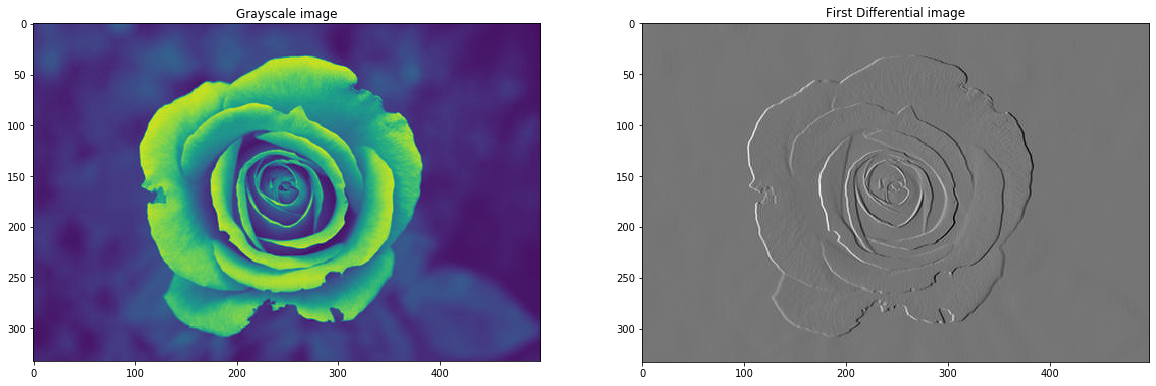

In [0]:
h,w = grayImg.shape
dx_image = grayImg[:,1:w-1] - grayImg[:,0:w-2]
print("Grayscale image entropy : ",shannon_entropy(grayImg[:,:]))
print("Entropy of first differential image : ",shannon_entropy(dx_image))
plot_compared_img(grayImg, dx_image,"Grayscale image", "First Differential image")

Bimodal Histogram : Thresholding technique

Actual Entropy of GrayImage :  7.149600281673462
Entropy using thresholding :  0.8661550501414256


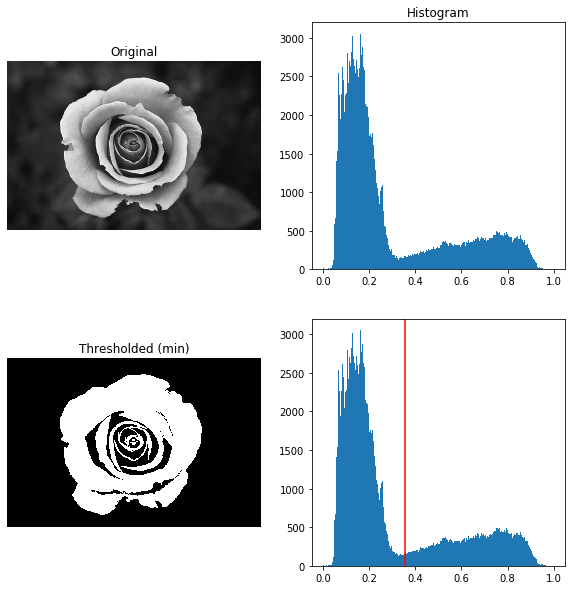

In [0]:
from skimage.filters import threshold_minimum

print("Actual Entropy of GrayImage : " ,shannon_entropy(grayImg[:,:]))
thresh_min = threshold_minimum(grayImg)
binary_min = grayImg > thresh_min
print("Entropy using thresholding : " ,shannon_entropy(binary_min[:,:]))
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(grayImg, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(grayImg.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

ax[1, 0].imshow(binary_min, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (min)')

ax[1, 1].hist(grayImg.ravel(), bins=256)
ax[1, 1].axvline(thresh_min, color='r')

for a in ax[:, 0]:
    a.axis('off')
plt.show()

Original Entropy of Graylevel image :  7.149600281673462
Entropy of first differential image :  5.244398154568182
Entropy using Global Thresholding of Graylevel image (otsu threshold) :  0.8400217053332149
Entropy using Global Thresholding of First Differential Image :  0.09584330566030608


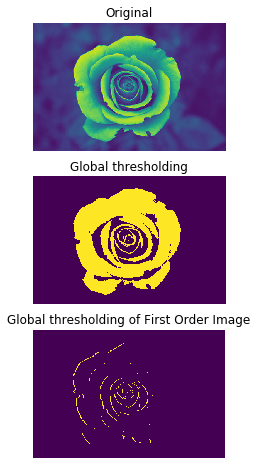

In [0]:
from skimage.filters import threshold_otsu, threshold_local


global_thresh = threshold_otsu(grayImg)
binary_global = grayImg > global_thresh

local_thresh = threshold_otsu(dx_image)
binary_global_dx_image = dx_image > local_thresh


fig, ax = plt.subplots(nrows=3, figsize=(7, 8))
print("Original Entropy of Graylevel image : " ,shannon_entropy(grayImg[:,:]))
print("Entropy of first differential image : ",shannon_entropy(dx_image))
ax[0].imshow(grayImg)
ax[0].set_title('Original')
print("Entropy using Global Thresholding of Graylevel image (otsu threshold) : " ,shannon_entropy(binary_global[:,:]))
ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding')
print("Entropy using Global Thresholding of First Differential Image : " ,shannon_entropy(binary_global_dx_image[:,:]))
ax[2].imshow(binary_global_dx_image)
ax[2].set_title('Global thresholding of First Order Image')


for a in ax:
    a.axis('off')
plt.show()


Original Entropy of Graylevel image :  14.927160179695102
Entropy of first differential image :  9.134324957751202
Entropy using Global Thresholding of Graylevel image (otsu threshold) :  0.9545747606107411
Entropy using Global Thresholding of First Differential Image :  0.6520840030409213


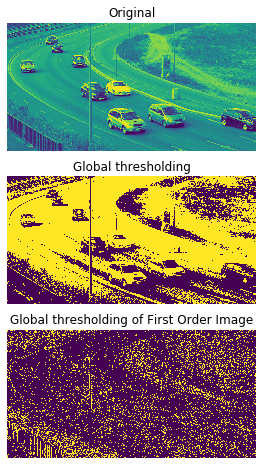

In [0]:
from skimage.filters import threshold_otsu, threshold_local


global_thresh = threshold_otsu(grayImg)
binary_global = grayImg > global_thresh

local_thresh = threshold_otsu(dx_image)
binary_global_dx_image = dx_image > local_thresh


fig, ax = plt.subplots(nrows=3, figsize=(7, 8))
print("Original Entropy of Graylevel image : " ,shannon_entropy(grayImg[:,:]))
print("Entropy of first differential image : ",shannon_entropy(dx_image))
ax[0].imshow(grayImg)
ax[0].set_title('Original')
print("Entropy using Global Thresholding of Graylevel image (otsu threshold) : " ,shannon_entropy(binary_global[:,:]))
ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding')
print("Entropy using Global Thresholding of First Differential Image : " ,shannon_entropy(binary_global_dx_image[:,:]))
ax[2].imshow(binary_global_dx_image)
ax[2].set_title('Global thresholding of First Order Image')


for a in ax:
    a.axis('off')
plt.show()
